TODO:
- Do some categorical variable analysis

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df = pd.read_csv('./cleaned_fake_job_postings.csv')
df.set_index("job_id", inplace=True)
df.head()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,function,fraudulent,text
job_id,,,,,,,,,
1,False,True,False,Other,Junior,NaN,Business,False,marketing intern we're food52 we've created gr...
2,False,True,False,Full-time,NaN,NaN,Business,False,customer service cloud video production 90 se...
3,False,True,False,NaN,NaN,NaN,NaN,False,commissioning machinery assistant cma valor se...
4,False,True,False,Full-time,Standard,Undergraduate,Business,False,account executive washington dc passion impro...
5,False,True,True,Full-time,Standard,Undergraduate,Healthcare,False,bill review manager spotsource solution llc gl...


In [3]:
def clean_label_name(text):
    return text.replace("_", " ").title()

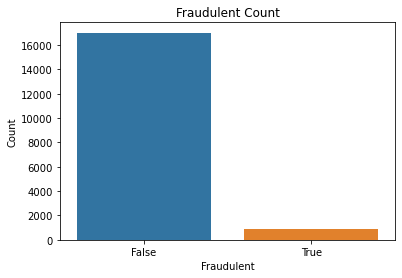

In [4]:
col = "fraudulent"
clean_label = clean_label_name(col)
ax = sns.countplot(x=col, data=df)
ax.set(xlabel=clean_label, ylabel='Count', title=f'{clean_label} Count')
plt.show()

([<matplotlib.patches.Wedge at 0x7f8710227100>,
 [Text(-1.0872905906487755, 0.16673083544034975, 'Fake'),
  Text(1.0872905828435406, -0.16673088634009564, 'Real')])

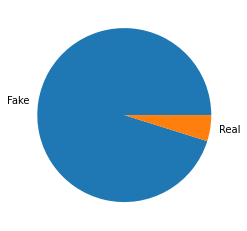

In [5]:
plt.pie(df["fraudulent"].value_counts(), labels=["Fake", "Real"])

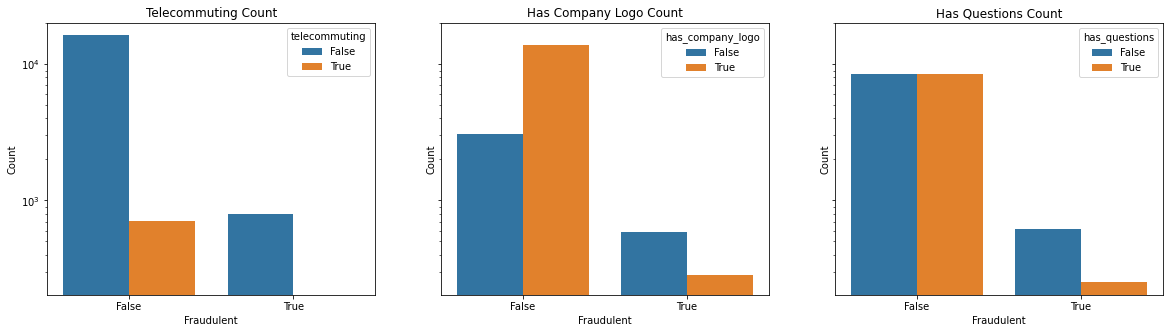

In [6]:
binary_columns = ["telecommuting", "has_company_logo", "has_questions"]
f, axes = plt.subplots(1, 3, sharey=True, figsize=(20, 5))
for i in range(len(binary_columns)):
    col = binary_columns[i]
    ax = axes[i]
    ax = sns.countplot(x="fraudulent", hue=col, data=df, ax=ax)
    ax.set(xlabel=clean_label_name("fraudulent"), ylabel='Count', title=f'{clean_label_name(col)} Count', yscale="log")
plt.show()

In [40]:
real_text = " ".join(df[df["fraudulent"] == 0].text)
fake_text = " ".join(df[df["fraudulent"] == 1].text)

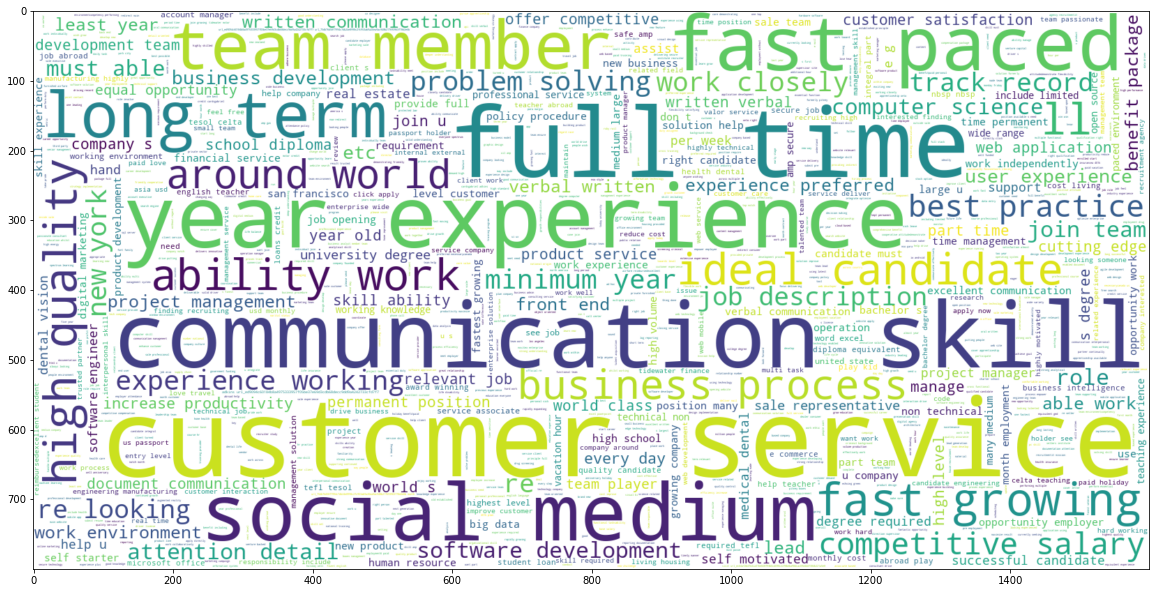

In [41]:
plt.figure(figsize = (20,20))

word_cloud = WordCloud(width = 1600 , height = 800 , max_words = 1000, background_color="white").generate(real_text)
plt.imshow(word_cloud, interpolation = 'bilinear')

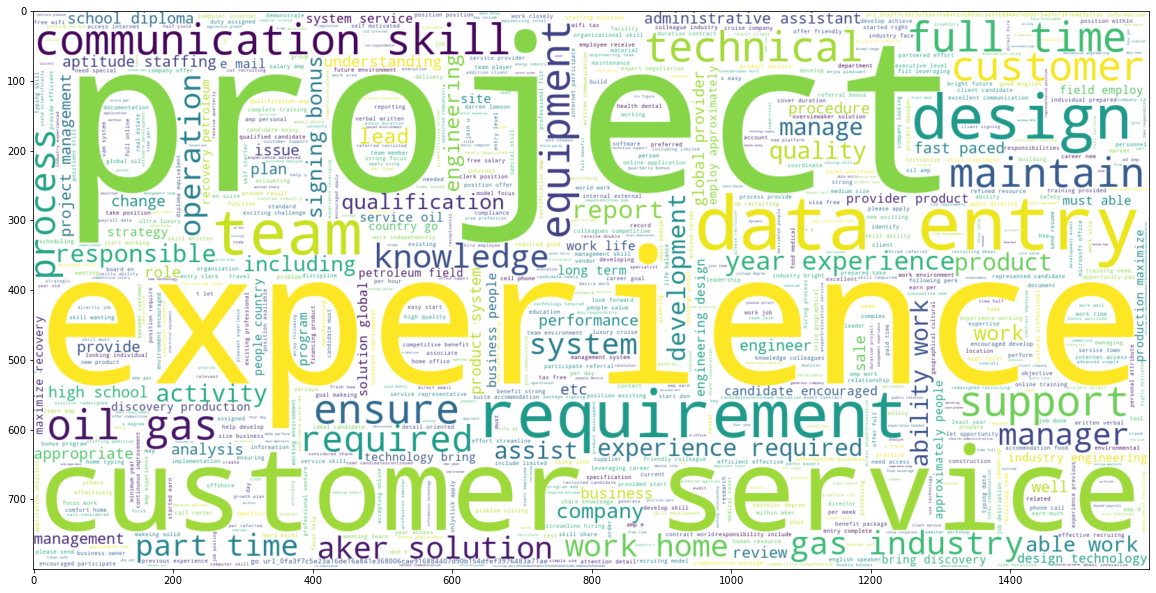

In [20]:
plt.figure(figsize = (20,20))

word_cloud = WordCloud(width = 1600 , height = 800 , max_words = 1000, background_color="white").generate(fake_text)
plt.imshow(word_cloud, interpolation = 'bilinear')

In [66]:
vectorizer = CountVectorizer(max_features=100)
X_real = vectorizer.fit_transform(df.loc[df["fraudulent"] == 0, "text"])
real_words_list = vectorizer.get_feature_names()
real_words_set = set(vectorizer.get_feature_names())
pd.DataFrame(X_real.toarray(), columns=real_words_list).sum(axis=0).sort_values(ascending=False).head(20)

experience     39463
team           37411
work           36770
company        28299
service        28154
customer       25894
business       23814
we             20505
client         19663
product        19147
new            17446
year           17100
management     16215
skill          16008
development    15945
sale           15656
time           15625
working        15584
amp            15459
job            14317
dtype: int64

In [67]:
vectorizer = CountVectorizer(max_features=100)
X_fake = vectorizer.fit_transform(df.loc[df["fraudulent"] == 1, "text"])
fake_words_list = vectorizer.get_feature_names()
fake_words_set = set(vectorizer.get_feature_names())
pd.DataFrame(X_fake.toarray(), columns=fake_words_list).sum(axis=0).sort_values(ascending=False).head(20)

work           1829
experience     1610
service        1287
amp            1154
skill          1112
customer       1046
company         963
team            943
product         904
time            865
position        856
project         821
business        773
management      730
system          707
ability         688
year            676
data            651
engineering     633
industry        612
dtype: int64

In [68]:
pd.DataFrame(real_words_set.difference(fake_words_set), columns=["Real words"])

,Real words
0,fast
1,great
2,software
3,marketing
4,want
5,you
6,growing
7,mobile
8,growth
9,market


In [69]:
pd.DataFrame(fake_words_set.difference(real_words_set), columns=["Fake Words"])

,Fake Words
0,good
1,perform
2,gas
3,engineer
4,per
5,plan
6,computer
7,000
8,call
9,entry
